In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import random
sns.set()

# P1

de [La documentación de Python](https://docs.python.org/3/library/random.html)

Almost all module functions depend on the basic function random(), which generates a random float uniformly in the semi-open range [0.0, 1.0). Python uses the Mersenne Twister as the core generator. It produces 53-bit precision floats and has a period of 2**19937-1. The underlying implementation in C is both fast and threadsafe. The Mersenne Twister is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is not suitable for all purposes, and is completely unsuitable for cryptographic purposes.

En resumen, la función $\text{random.random()}$ genera un número pseudo aleatorio uniforme en $[0,1]$, de forma de que:
* El número posee 53 bits de precisión.
* Posee un periodo de $2^{19937}-1$.
* Lo logra usando el método __Mersenne Twister__.

Para cambiar la semilla, se utiliza el comando $\text{random.seed(semilla)}$, que recibe un entero y configura la forma en que se genera el número aleatorio.

Una forma astuta de setear la semilla es utilizar un número entero generado por variables externas al computador, como por ejemplo el tiempo en que se ejecuta el código.

**falta explicar algo del método _mersenne twister_ ?**
se podría ver la wikipedia jeje
https://es.wikipedia.org/wiki/Mersenne_twister
https://es.wikipedia.org/wiki/N%C3%BAmero_primo_de_Mersenne

# P2
Se calculan las varianzas teóricas de

$$ X = \sqrt{1-U^2},\quad Z = 1_{\{U_1^2+U_2^2 \leq 1\}},$$ 
con $U,U_1,U_2$ variables uniformes en $[0,1]$ independientes.

----

Para $\mathbb V(X)$, se separa la varianza,
$$ \mathbb V(X) = E(X^2) - E(X)^2 $$
Se usa el hecho de que,
$$ X^2 = 1-U^2 $$
Luego,
$$ \mathbb V(X) = 1-E(U^2) - E(\sqrt{1-U^2})^2.$$
Se calcula individualmente las esperanzas,

$$ \begin{matrix}E\left(\sqrt{1-U^2}\right) & = & \int_0^1 \sqrt{1-x^2} f_U(x)\ dx = \int_0^1 \sqrt{1-x^2} \ dx \underset{enunciado}{=} I = \frac{\pi}{4}, \\ E(U^2) & = & E(U^2) - E(U)^2 + E(U)^2 = \mathbb V(U) + E(U)^2 = \frac{(1-0)^2}{12} + \frac{1}{4} = \frac{1+3}{12} = \frac{1}{3}.  \end{matrix}   $$

$$ \mathbb V(X) =  1- \frac{1}{3} - \frac{\pi^2}{16} \approx 0.0498$$

----

Para $\mathbb V(Z)$ es más simple, se utiliza el hecho de que el cuadrado de una indicatriz es ella misma.

$$\mathbb V(Z) = E((1_{U_1^2+U_2^2 \leq 1})^2) - E(Z)^2 = E(Z) - E(Z)^2 \underset{enunciado}{=} \frac{\pi}{4} - \frac{\pi^2}{16} = \pi\frac{4-\pi}{16} \approx 0,1685. $$

### Simulemos las varianzas

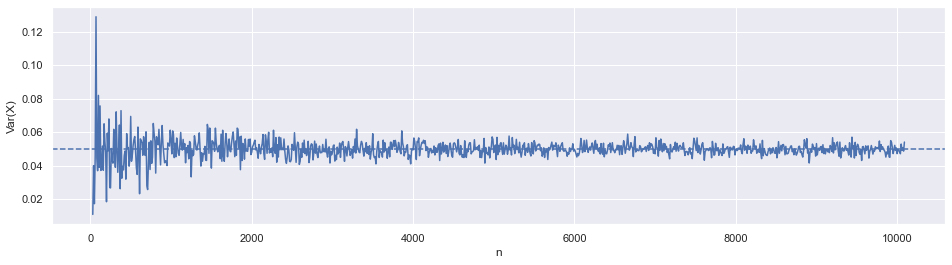

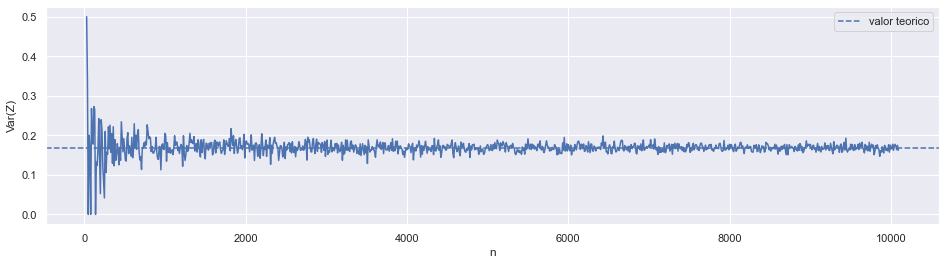

In [32]:
### Definamos nuestras variables aleatorias

def X(u): return np.sqrt(1 - u**2)

# np.where nos permite trabajar sin if's y con arrays
def Z(u, v): return np.where(u**2 + v**2 <= 1, 1, 0)

### Calculemos las varianzas para distintos n's

n = np.arange(10, 10100, 10)
varX = np.zeros(len(n))
varZ = np.zeros(len(n))

for i in range(len(n)):
    U = np.random.uniform(size=i)
    V = np.random.uniform(size=i)
    random.seed(7835 + 11*i)

    # estimamos la varianza mediante un estimador no sesgado

    XX = X(U)
    ZZ = Z(U, V)

    varX[i] = np.var(XX, ddof=1) # ddof=1 equivale a dividir por n-1
    varZ[i] = np.var(ZZ, ddof=1)

varX_teo = (2/3) - np.pi**2/16
varZ_teo = np.pi/4 - (np.pi / 4)**2

plt.figure(0, figsize=(16, 4))
plt.plot(n, varX)
plt.xlabel('n')
plt.ylabel('Var(X)')
plt.axhline(varX_teo, linestyle='--', label='valor teorico')
plt.legend
plt.show()

plt.figure(1, figsize=(16, 4))
plt.plot(n, varZ)
plt.xlabel('n')
plt.ylabel('Var(Z)')
plt.axhline(varZ_teo, linestyle='--', label='valor teorico')
plt.legend()
plt.show()


### Obtengamos $"n"$ tal que el error sea menor a 1% 

In [35]:
for i in range(len(n)):
    if np.abs((varX_teo - varX[i])/varX_teo) <= 0.01:
        nn_x = n[i]
        break

for i in range(len(n)):
    if np.abs((varZ_teo - varZ[i])/varZ_teo) <= 0.01:
        nn_z = n[i]
        break

print('En las realizaciones hechas se necesita')
print()
print('un n = {} para X'.format(nn_x))
print()
print('un n = {} para Z'.format(nn_z))

En las realizaciones hechas se necesita

un n = 260 para X

un n = 440 para Z


260